## Assignment: Cross Validation of Logistic Regression Model

Following assignment-1, we have a dataset for titanic passengers. Here is the first 5 rows of the dataset:

In [116]:
import pandas as pd

data = pd.read_csv('titanic_cross_validation.csv')
data.head()

,Survived,Age,SibSp,Parch,male,Q,S
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,0,1,0,1


As you can see, in the dataset we have 6 input features ["Age","SibSp","Parch","male","Q","S"] and 1 binary output "Survived". In this assignment, please iterate over all the possible feature subsets and do cross validation to find the best feature subset.

Here are some guidelines:
1. Generate all the possible feature subsets;
2. Split data into train, valid and test sets. The proportion is $80\%\times80\%:80\%\times20\%:20\%$;
3. Fit a logistic regression model for each feature subset and find the accuracy on the valid set;
4. Find the feature subset with maximal accuracy;
5. Fit a logistic regression model with the optimal feature subset and calculate the accuracy on test set.
6. Plot the ROC grapfor the optimal model.

In [117]:
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['male'] = le.fit_transform(data['male'])
data['Q'] = le.fit_transform(data['Q'])
data['S'] = le.fit_transform(data['S'])

In [118]:
list(data.columns[1:])

['Age', 'SibSp', 'Parch', 'male', 'Q', 'S']

In [119]:
from itertools import combinations

def all_subsets(my_list):
    subs = []
    for i in range(1, len(my_list) + 1):
        subs += combinations(my_list, i)
    subset_List = []
    for i in subs:
        subset_List += [list(i)]
    return subset_List

features_subs = all_subsets(data.columns[1:])

In [120]:
features_subs

[['Age'],
 ['SibSp'],
 ['Parch'],
 ['male'],
 ['Q'],
 ['S'],
 ['Age', 'SibSp'],
 ['Age', 'Parch'],
 ['Age', 'male'],
 ['Age', 'Q'],
 ['Age', 'S'],
 ['SibSp', 'Parch'],
 ['SibSp', 'male'],
 ['SibSp', 'Q'],
 ['SibSp', 'S'],
 ['Parch', 'male'],
 ['Parch', 'Q'],
 ['Parch', 'S'],
 ['male', 'Q'],
 ['male', 'S'],
 ['Q', 'S'],
 ['Age', 'SibSp', 'Parch'],
 ['Age', 'SibSp', 'male'],
 ['Age', 'SibSp', 'Q'],
 ['Age', 'SibSp', 'S'],
 ['Age', 'Parch', 'male'],
 ['Age', 'Parch', 'Q'],
 ['Age', 'Parch', 'S'],
 ['Age', 'male', 'Q'],
 ['Age', 'male', 'S'],
 ['Age', 'Q', 'S'],
 ['SibSp', 'Parch', 'male'],
 ['SibSp', 'Parch', 'Q'],
 ['SibSp', 'Parch', 'S'],
 ['SibSp', 'male', 'Q'],
 ['SibSp', 'male', 'S'],
 ['SibSp', 'Q', 'S'],
 ['Parch', 'male', 'Q'],
 ['Parch', 'male', 'S'],
 ['Parch', 'Q', 'S'],
 ['male', 'Q', 'S'],
 ['Age', 'SibSp', 'Parch', 'male'],
 ['Age', 'SibSp', 'Parch', 'Q'],
 ['Age', 'SibSp', 'Parch', 'S'],
 ['Age', 'SibSp', 'male', 'Q'],
 ['Age', 'SibSp', 'male', 'S'],
 ['Age', 'SibSp', 'Q', 

In [121]:
from sklearn.model_selection import train_test_split

train_valid_XY, test_XY = train_test_split(data, test_size=0.2, random_state=0)
train_XY, valid_XY = train_test_split(train_valid_XY, test_size=0.2, random_state=0)

In [122]:
train_XY[features_subs[5]]

,S
705,1
701,0
172,1
73,1
796,1
...,...
567,0
495,0
91,1
371,1


Q3 - Fit a logistic regression model for each feature subset and find the accuracy on the valid set

In [123]:
from sklearn import linear_model
import numpy as np

accuracy_cv = []

for i in features_subs:
    train_X, train_Y = train_XY[i], train_XY['Survived']
    valid_X, valid_Y = valid_XY[i], valid_XY['Survived']
    
    logisticReg = linear_model.LogisticRegression()
    logisticReg.fit(train_X, train_Y)
    
    sub_accuracy_cv = logisticReg.score(valid_X, valid_Y)
    accuracy_cv = np.append(accuracy_cv, sub_accuracy_cv)

In [124]:
accuracy_cv

array([0.6013986 , 0.6013986 , 0.59440559, 0.76223776, 0.6013986 ,
       0.6013986 , 0.6013986 , 0.60839161, 0.76223776, 0.6013986 ,
       0.62937063, 0.59440559, 0.77622378, 0.6013986 , 0.6013986 ,
       0.76223776, 0.59440559, 0.61538462, 0.76223776, 0.76223776,
       0.66433566, 0.60839161, 0.77622378, 0.6013986 , 0.63636364,
       0.76223776, 0.60839161, 0.61538462, 0.76223776, 0.76223776,
       0.63636364, 0.77622378, 0.59440559, 0.61538462, 0.77622378,
       0.77622378, 0.66433566, 0.76223776, 0.76223776, 0.61538462,
       0.76223776, 0.77622378, 0.60839161, 0.64335664, 0.77622378,
       0.77622378, 0.64335664, 0.76223776, 0.76223776, 0.61538462,
       0.76223776, 0.77622378, 0.77622378, 0.61538462, 0.77622378,
       0.76223776, 0.77622378, 0.77622378, 0.63636364, 0.77622378,
       0.76923077, 0.77622378, 0.77622378])

Q4 - Find the feature subset with maximal accuracy

In [125]:
max(accuracy_cv)

0.7762237762237763

In [126]:
features_subs[accuracy_cv.argmax()]

['SibSp', 'male']

Q5 - Fit a logistic regression model with the optimal feature subset and calculate the accuracy on test set

In [127]:
best_features = features_subs[accuracy_cv.argmax()]

train_valid_X, train_valid_Y = train_valid_XY[best_features], train_valid_XY['Survived']
test_X, test_Y = test_XY[best_features], test_XY['Survived']

logisticReg = linear_model.LogisticRegression()
logisticReg.fit(train_valid_X, train_valid_Y)

LogisticRegression()

In [128]:
logisticReg.coef_

array([[-0.30704941, -2.76069155]])

In [129]:
logisticReg.score(test_X, test_Y)

0.7191011235955056

Q6 - Plot the ROC grapfor the optimal model

In [130]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

'''
def get_unique_numbers(numbers):
    
    list_of_unique_numbers = []
    unique_numbers = set(numbers)
    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers


sibsp = get_unique_numbers(data['SibSp'])
male = get_unique_numbers(data['male'])
'''


"\ndef get_unique_numbers(numbers):\n    \n    list_of_unique_numbers = []\n    unique_numbers = set(numbers)\n    for number in unique_numbers:\n        list_of_unique_numbers.append(number)\n\n    return list_of_unique_numbers\n\n\nsibsp = get_unique_numbers(data['SibSp'])\nmale = get_unique_numbers(data['male'])\n"

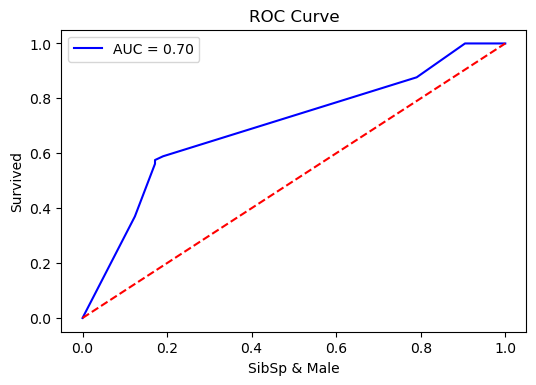

In [131]:
# the area under the curve
fpr, tpr, thresholds = roc_curve(test_Y, logisticReg.predict_proba(test_X)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(dpi=100)
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('Survived')
plt.xlabel('SibSp & Male')
plt.legend()
plt.show()